In [1]:
import matplotlib.pyplot as plt

import mahotas as mh
import pandas as pd
import numpy as np

import cv2
import os
import shutil

In [2]:
def create_directory_for_results(path, dir_name):
    """
    Create folder for results.

    Parameters:
    - path (str): The base path for creating the directory.
    - dir_name (str): The name of the directory to be created.

    Returns:
    - str: The path of the created directory.
    """

    path = f'{path}{dir_name}/'

    if os.path.isdir(path):
        shutil.rmtree(path)

    os.mkdir(path)

    return path

In [3]:
DIR_NAME = 'Labeled_Data_PoC'

DATA_PATH = f'../../../Results/Resizing_Images/Images_PoC/'
LABEL_PATH = f'../../../Results/Resizing_Images/Labels_PoC/'
OUTPUT_PATH = f'../../../Results/Analysis/'

OUTPUT_PATH = create_directory_for_results(OUTPUT_PATH, DIR_NAME)

RESOLUTION = 500*500

list_of_names_img = os.listdir(DATA_PATH)
list_of_names_labels = os.listdir(LABEL_PATH)

N_images = len(list_of_names_img)

classes = ['Pozadí', 'Cytoplazma', 'Jádro']
channels = ['Modrý', 'Zelený', 'Červený']

classes_shortcuts = ['B', 'C', 'N']
channels_shortcuts = ['B', 'G', 'R']

sizes_labels = ['Buňka', 'Jádro']

## Pokrytí snímku jednotlivými segmenty
+ Pozadí
+ Cytoplazma
+ Jádra

In [4]:
surface_coverage = np.zeros((N_images,len(classes)))

for index, (img_name,lbl_name) in enumerate(zip(list_of_names_img,list_of_names_labels)):

    print(f'In progress {index + 1} / {N_images} : {img_name} | {lbl_name}')

    y = np.loadtxt(f'{LABEL_PATH}{lbl_name}', dtype=int)

    unique_values, counts = np.unique(y, return_counts=True)

    surface_coverage[index, :] = counts / (y.shape[0] * y.shape[1])

In progress 1 / 10 : 2023_12_14_image_000.png | 2023_12_14_image_000.txt
In progress 2 / 10 : 2023_12_14_image_005.png | 2023_12_14_image_005.txt
In progress 3 / 10 : 2023_12_14_image_008.png | 2023_12_14_image_008.txt
In progress 4 / 10 : 2023_12_14_image_017.png | 2023_12_14_image_017.txt
In progress 5 / 10 : 2023_12_14_image_018.png | 2023_12_14_image_018.txt
In progress 6 / 10 : 2023_12_14_image_024.png | 2023_12_14_image_024.txt
In progress 7 / 10 : 2023_12_14_image_025.png | 2023_12_14_image_025.txt
In progress 8 / 10 : 2023_12_14_image_031.png | 2023_12_14_image_031.txt
In progress 9 / 10 : 2023_12_14_image_032.png | 2023_12_14_image_032.txt
In progress 10 / 10 : 2023_12_14_image_038.png | 2023_12_14_image_038.txt


In [5]:
img_names_to_plot = [name[11:-4] for name in list_of_names_img]

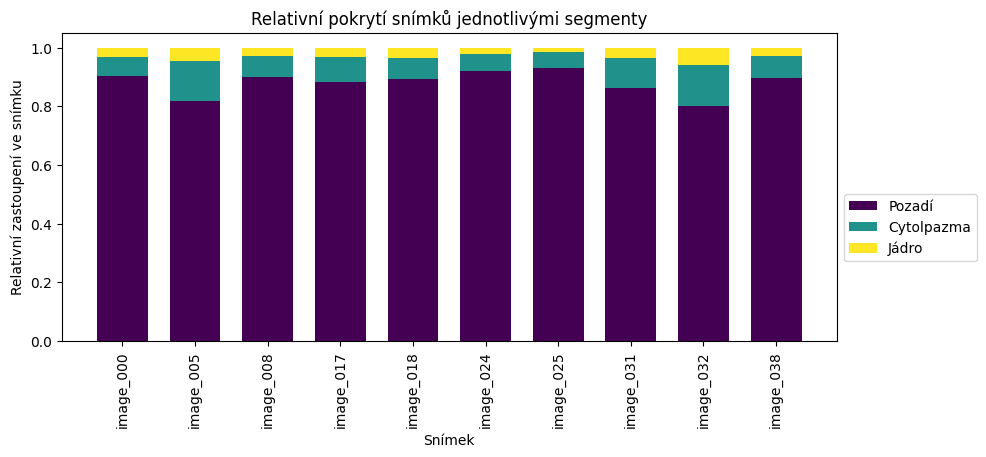

In [6]:
bar_width = 0.7
x = np.arange(len(list_of_names_img))

fig, ax = plt.subplots(figsize=(10, 4))

bar_background = ax.bar(x, surface_coverage[:, 0], bar_width, label='Pozadí', color=plt.get_cmap('viridis')(0.0))
bar_cytoplasm = ax.bar(x, surface_coverage[:, 1], bar_width, label='Cytolpazma', color=plt.get_cmap('viridis')(0.5), bottom=surface_coverage[:, 0])
bar_nucleus = ax.bar(x, surface_coverage[:, 2], bar_width, label='Jádro', color=plt.get_cmap('viridis')(1.0), bottom=surface_coverage[:, 0] + surface_coverage[:, 1])

ax.set_xlabel('Snímek')
ax.set_ylabel('Relativní zastoupení ve snímku')
ax.set_title('Relativní pokrytí snímků jednotlivými segmenty')
ax.set_xticks(x)
ax.set_xticklabels(img_names_to_plot, rotation=90)
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.savefig(f'{OUTPUT_PATH}/Graf_pokryti.png')
plt.show()


In [7]:
for i in range(3):
    print(f'Minimální počet pixelů pro label {classes[i]} je: {np.min(surface_coverage[:, i])}')
    print(f'Maximální počet pixelů pro label {classes[i]} je: {np.max(surface_coverage[:, i])}')

Minimální počet pixelů pro label Pozadí je: 0.799296
Maximální počet pixelů pro label Pozadí je: 0.931212
Minimální počet pixelů pro label Cytoplazma je: 0.055188
Maximální počet pixelů pro label Cytoplazma je: 0.140984
Minimální počet pixelů pro label Jádro je: 0.0136
Maximální počet pixelů pro label Jádro je: 0.05972


In [8]:
def get_mean_std_per_channel(img, lbl_img, dict_stats):

    for i, lbl in enumerate(classes_shortcuts):
        for ii, channel in enumerate(channels_shortcuts):
            key_m = f'mean_{lbl}_{channel}'
            key_s = f'std_{lbl}_{channel}'

            dict_stats[key_m].append(np.mean(img[lbl_img == i, ii])) 
            dict_stats[key_s].append(np.std(img[lbl_img == i, ii]))

    return dict_stats

In [9]:
from collections import defaultdict
mean_std_stats = defaultdict(list)

for index, (img_name,lbl_name) in enumerate(zip(list_of_names_img,list_of_names_labels)):

    img = cv2.imread(f'{DATA_PATH}{img_name}')
    y = np.loadtxt(f'{LABEL_PATH}{lbl_name}', dtype=int)

    mean_std_stats = get_mean_std_per_channel(img, y, mean_std_stats)

df = pd.DataFrame(mean_std_stats)
df.head()

,mean_B_B,std_B_B,mean_B_G,std_B_G,mean_B_R,std_B_R,mean_C_B,std_C_B,mean_C_G,std_C_G,mean_C_R,std_C_R,mean_N_B,std_N_B,mean_N_G,std_N_G,mean_N_R,std_N_R
0,199.861104,6.446726,236.525310,10.805968,244.747729,11.361342,178.604265,14.294418,173.196690,33.609513,166.403980,38.634444,150.981783,25.346926,110.016649,38.371073,106.572928,39.564077
1,202.445168,6.396292,237.794253,11.058725,244.426677,12.560573,182.783779,12.842338,181.547420,32.902060,173.763351,38.928095,158.838747,14.632366,117.607767,34.022835,111.833539,33.924042
2,200.875029,6.133520,238.533258,9.647757,246.915473,9.902284,180.340561,15.394562,181.500258,35.318052,177.026444,40.786681,157.402937,15.257811,119.910147,31.274222,116.572630,32.305495
3,202.265045,5.934030,237.985977,9.855036,245.215412,10.592843,182.400963,15.676351,180.675436,38.139936,174.601701,43.122450,158.421594,15.319257,116.512373,34.963007,113.141704,36.479602
4,201.005271,6.363622,236.768365,10.389647,245.616984,10.146417,178.240584,13.447075,173.183442,33.552179,168.019968,38.371364,158.468942,14.450888,120.988506,33.886339,119.785208,35.325013


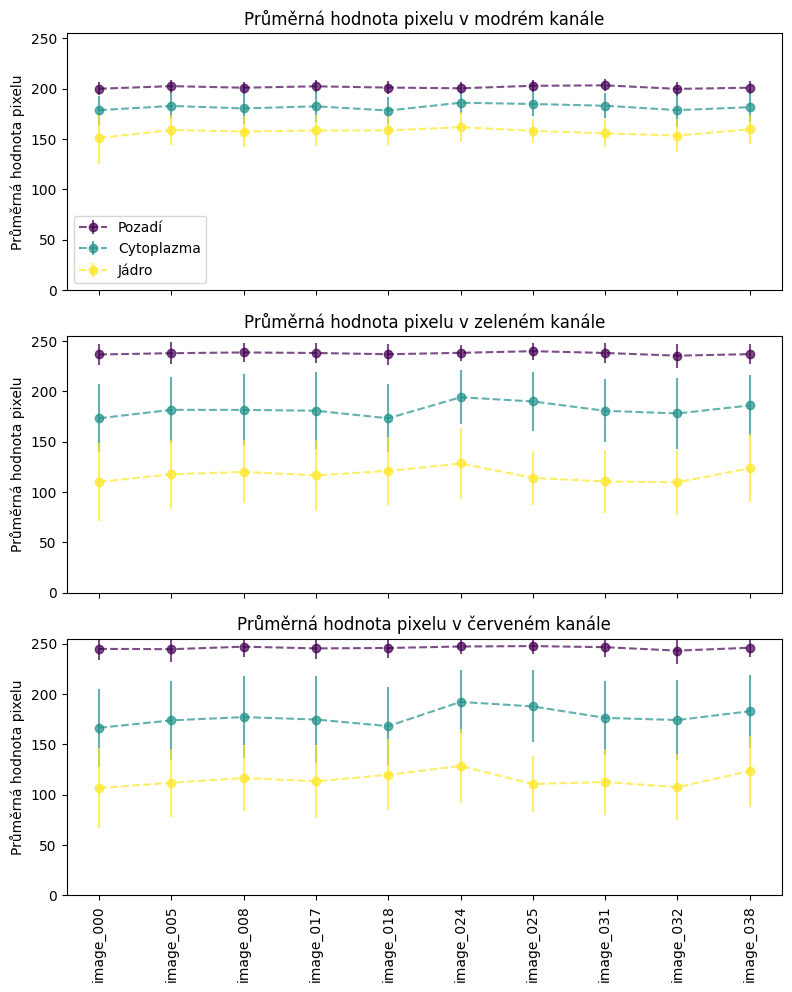

In [24]:
d = {'B': 'modrém', 'G': 'zeleném', 'R': 'červeném'}

fig, axes = plt.subplots(3, 1, figsize=(8, 10))

for i, channel in enumerate(channels_shortcuts):

    axes[i].errorbar(img_names_to_plot, mean_std_stats[f'mean_B_{channel}'], yerr=mean_std_stats[f'std_B_{channel}'], fmt='o', linestyle='--', label='Pozadí', color=plt.get_cmap('viridis')(0.0), alpha=0.7)
    axes[i].errorbar(img_names_to_plot, mean_std_stats[f'mean_C_{channel}'], yerr=mean_std_stats[f'std_C_{channel}'], fmt='o', linestyle='--', label='Cytoplazma', color=plt.get_cmap('viridis')(0.5), alpha=0.7)
    axes[i].errorbar(img_names_to_plot, mean_std_stats[f'mean_N_{channel}'], yerr=mean_std_stats[f'std_N_{channel}'], fmt='o', linestyle='--', label='Jádro', color=plt.get_cmap('viridis')(1.0), alpha=0.7)

    #axes[i].set_xlabel('Snímek')
    axes[i].set_ylabel('Průměrná hodnota pixelu')
    axes[i].set_title(f'Průměrná hodnota pixelu v {d[channel]} kanále')

    axes[i].set_ylim((0,255))
    axes[i].set_xticklabels([])

axes[-1].set_xticks(range(len(img_names_to_plot)))
axes[-1].set_xticklabels(img_names_to_plot, rotation=90)

axes[0].legend(loc='best')

plt.tight_layout(pad=1.0)
plt.show()

In [11]:
d = {'B': 'modrém', 'G': 'zeleném', 'R': 'červeném'}

for i, channel in enumerate(channels_shortcuts):

    plt.figure(figsize=(10,4))

    plt.errorbar(img_names_to_plot, mean_std_stats[f'mean_B_{channel}'], yerr=mean_std_stats[f'std_B_{channel}'], fmt='o', linestyle='--', label='Pozadí', color=plt.get_cmap('viridis')(0.0), alpha=0.7)
    plt.errorbar(img_names_to_plot, mean_std_stats[f'mean_C_{channel}'], yerr=mean_std_stats[f'std_C_{channel}'], fmt='o', linestyle='--', label='Cytoplazma', color=plt.get_cmap('viridis')(0.5), alpha=0.7)
    plt.errorbar(img_names_to_plot, mean_std_stats[f'mean_N_{channel}'], yerr=mean_std_stats[f'std_N_{channel}'], fmt='o', linestyle='--', label='Jádro', color=plt.get_cmap('viridis')(1.0), alpha=0.7)

    plt.xlabel('Snímek')
    plt.ylabel('Průměrná hodnota pixelu')
    plt.title(f'Průměrná hodnota pixelu v {d[channel]} kanále')

    plt.ylim((0,255))

    plt.xticks(range(len(img_names_to_plot)), img_names_to_plot, rotation=90)

    plt.legend(loc='best')
    plt.savefig(f'{OUTPUT_PATH}/Graf_prumeru_{channel}.png')

    plt.close()

In [12]:
def get_min_max_per_image(img, dict_stats):

    for i, channel in enumerate(channels_shortcuts):

        dict_stats[f'min_{channel}'].append(np.min(img[:, :, i])) 
        dict_stats[f'max_{channel}'].append(np.max(img[:, :, i]))

    return dict_stats

In [13]:
from collections import defaultdict
min_max_stats = defaultdict(list)

for index, (img_name,lbl_name) in enumerate(zip(list_of_names_img,list_of_names_labels)):

    img = cv2.imread(f'{DATA_PATH}{img_name}')
    y = np.loadtxt(f'{LABEL_PATH}{lbl_name}', dtype=int)

    min_max_stats = get_min_max_per_image(img, min_max_stats)

df = pd.DataFrame(min_max_stats)
df.head()

,min_B,max_B,min_G,max_G,min_R,max_R
0,34,222,10,255,8,255
1,81,222,37,255,27,255
2,92,221,28,255,28,255
3,69,222,28,255,26,255
4,109,221,30,255,28,255


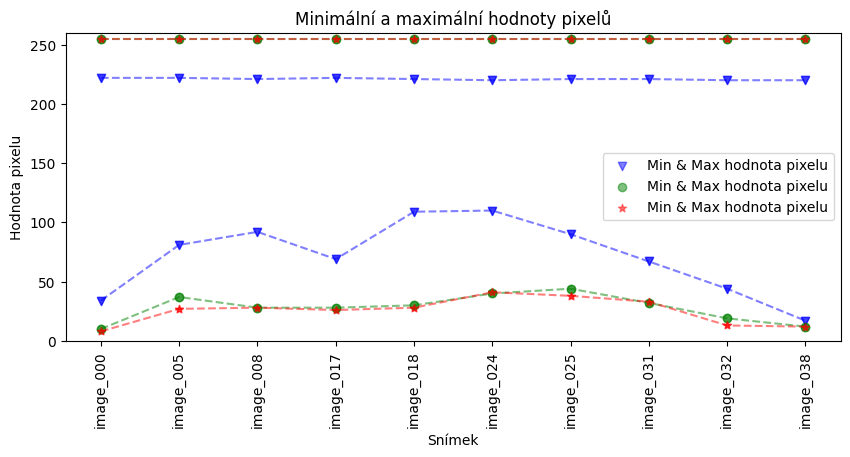

In [14]:
plt.figure(figsize=(10, 4))

m = {'R': '*', 'G':'o', 'B': 'v'}
for i, channel in enumerate(channels_shortcuts):

    plt.scatter(img_names_to_plot, min_max_stats[f'min_{channel}'], color=channel.lower(), label='Min & Max hodnota pixelu', alpha=0.5,marker=m[channel])
    plt.plot(img_names_to_plot, min_max_stats[f'min_{channel}'], '--', color=channel.lower(), alpha=0.5,marker=m[channel])
    plt.scatter(img_names_to_plot, min_max_stats[f'max_{channel}'], color=channel.lower(), alpha=0.5,marker=m[channel])
    plt.plot(img_names_to_plot, min_max_stats[f'max_{channel}'], '--', color=channel.lower(), alpha=0.5,marker=m[channel])

plt.xticks(rotation=90)
plt.xlabel('Snímek')
plt.ylabel('Hodnota pixelu')
plt.title('Minimální a maximální hodnoty pixelů')

plt.ylim((0,260))

plt.legend(loc='best')
plt.savefig(f'{OUTPUT_PATH}/Graf_extremu.png')
plt.show()


In [15]:
def get_sizes(img_lbl, dict_stats):

    bin_cell = img_lbl != 0
    bin_nucleus = img_lbl == 2

    labeled_cell, _ = mh.label(bin_cell)
    labeled_nucleus, _ = mh.label(bin_nucleus)

    sizes_cell = mh.labeled.labeled_size(labeled_cell)
    sizes_nucleus = mh.labeled.labeled_size(labeled_nucleus)

    dict_stats['sizes_cell'].extend(list(sizes_cell[1:]))
    dict_stats['sizes_nucleus'].extend(list(sizes_nucleus[1:]))
    
    return dict_stats

In [16]:
from collections import defaultdict
sizes_stats = defaultdict(list)

for index, (img_name,lbl_name) in enumerate(zip(list_of_names_img,list_of_names_labels)):
    
    y = np.loadtxt(f'{LABEL_PATH}{lbl_name}', dtype=int)

    sizes_stats = get_sizes(y, sizes_stats)

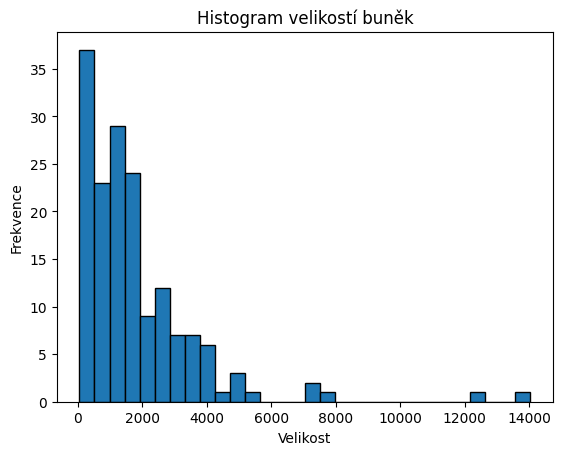

In [17]:
plt.hist(sizes_stats['sizes_cell'], bins=30, edgecolor='black')
plt.title('Histogram velikostí buněk')
plt.xlabel('Velikost')
plt.ylabel('Frekvence')
plt.show()

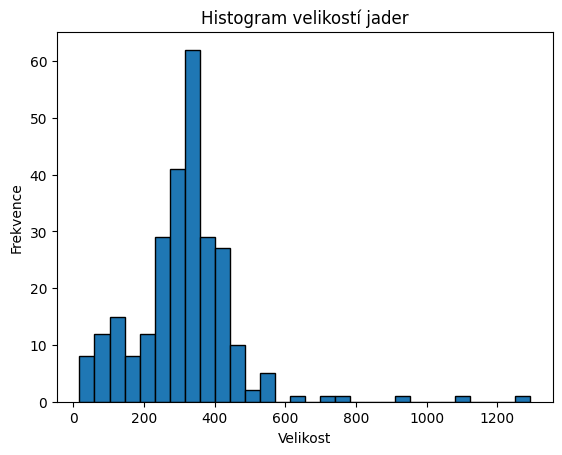

In [18]:
plt.hist(sizes_stats['sizes_nucleus'], bins=30, edgecolor='black')
plt.title('Histogram velikostí jader')
plt.xlabel('Velikost')
plt.ylabel('Frekvence')
plt.show()

In [19]:
for i, key in enumerate(sizes_stats.keys()):
    print(f'{sizes_labels[i]} má největší velikost {max(sizes_stats[key])}')
    print(f'{sizes_labels[i]} má nejmenší velikost {min(sizes_stats[key])}')

Buňka má největší velikost 14042
Buňka má nejmenší velikost 56
Jádro má největší velikost 1293
Jádro má nejmenší velikost 17
